In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final Year Project/Sub1_Sub3_FD.csv')
df.head()

,-4.32E+05,-2.47E+04,1.56E+05,9.75E+04,7.40E+04,9.75E+04.1,1.56E+05.1,-2.47E+04.1,Target
0,-759000.0,-48600.0,263000.0,159000.0,123000.0,159000.0,263000.0,-48600.0,1
1,-812000.0,-62500.0,258000.0,146000.0,118000.0,146000.0,258000.0,-62500.0,1
2,-721000.0,-63500.0,213000.0,114000.0,95200.0,114000.0,213000.0,-63500.0,1
3,-683000.0,-53200.0,218000.0,125000.0,99700.0,125000.0,218000.0,-53200.0,1
4,-689000.0,-40700.0,247000.0,154000.0,117000.0,154000.0,247000.0,-40700.0,1


In [ ]:
df.isnull().sum()

-4.32E+05      0
-2.47E+04      0
1.56E+05       0
9.75E+04       0
7.40E+04       0
9.75E+04.1     0
1.56E+05.1     0
-2.47E+04.1    0
Target         0
dtype: int64

**Deep Learning LSTM-CNN**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, MaxPooling1D, Flatten, BatchNormalization, Dropout

In [ ]:
# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Final Year Project/Sub1_Sub3_FD.csv')

In [ ]:
# Extract features and target variable
X = df.iloc[:, :-1].values  # Assuming the last column is the target variable
y = df.iloc[:, -1].values

In [ ]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Reshape the data for LSTM-CNN model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Define the complex LSTM-CNN model
model = Sequential()

In [ ]:
# First Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

In [ ]:
# LSTM Layers
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(50))

In [ ]:
# Dense Layers
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [ ]:
# Output Layer
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Print model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 6, 64)             256       
                                                                 
 batch_normalization_10 (Ba  (None, 6, 64)             256       
 tchNormalization)                                               
                                                                 
 max_pooling1d_11 (MaxPooli  (None, 3, 64)             0         
 ng1D)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 3, 64)             0         
                                                                 
 lstm (LSTM)                 (None, 3, 100)            66000     
                                                                 
 lstm_1 (LSTM)               (None, 50)               

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
2500/2500 [==============================] - 32s 10ms/step - loss: 0.1978 - accuracy: 0.9154 - val_loss: 0.0886 - val_accuracy: 0.9669
Epoch 2/20
2500/2500 [==============================] - 24s 10ms/step - loss: 0.1060 - accuracy: 0.9635 - val_loss: 0.0798 - val_accuracy: 0.9722
Epoch 3/20
2500/2500 [==============================] - 23s 9ms/step - loss: 0.0888 - accuracy: 0.9706 - val_loss: 0.0553 - val_accuracy: 0.9811
Epoch 4/20
2500/2500 [==============================] - 24s 10ms/step - loss: 0.0781 - accuracy: 0.9743 - val_loss: 0.0547 - val_accuracy: 0.9809
Epoch 5/20
2500/2500 [==============================] - 24s 10ms/step - loss: 0.0715 - accuracy: 0.9764 - val_loss: 0.0671 - val_accuracy: 0.9778
Epoch 6/20
2500/2500 [==============================] - 24s 10ms/step - loss: 0.0680 - accuracy: 0.9770 - val_loss: 0.0434 - val_accuracy: 0.9853
Epoch 7/20
2500/2500 [==============================] - 24s 10ms/step - loss: 0.0632 - accuracy: 0.9797 - val_loss: 0.0431 - 

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy * 100:.2f}%')

625/625 [==============================] - 2s 4ms/step - loss: 0.0339 - accuracy: 0.9886
Test Loss: 0.0339, Test Accuracy: 98.86%


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Print accuracy, F1 score, precision, and recall
print("Classification Report:\n", classification_report(y_test, y_pred_binary))

625/625 [==============================] - 3s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      9921
           1       0.99      0.98      0.99     10078

    accuracy                           0.99     19999
   macro avg       0.99      0.99      0.99     19999
weighted avg       0.99      0.99      0.99     19999



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 98.86%


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_binary)
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.9886


In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred_binary)
print(f'Precision: {precision:.4f}')

Precision: 0.9948


In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred_binary)
print(f'Recall: {recall:.4f}')

Recall: 0.9825


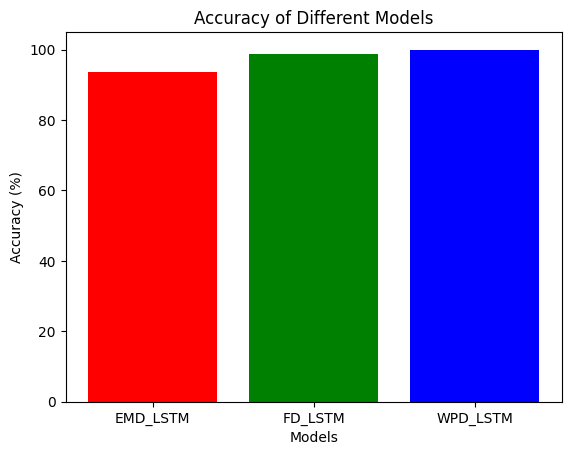

In [ ]:
import matplotlib.pyplot as plt

# Data
x_values = ['EMD_LSTM', 'FD_LSTM', 'WPD_LSTM']
y_values = [93.73, 98.86, 99.95]

# Create bar chart
plt.bar(x_values, y_values, color=['red', 'green', 'blue'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models')

# Show the plot
plt.show()

# **Simple CNN**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten

In [ ]:
# Assuming your dataset is stored in a pandas DataFrame called 'df'
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Reshape the data for the CNN (assuming 14 features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.2956 - accuracy: 0.9026 - val_loss: 0.1301 - val_accuracy: 0.9601
Epoch 2/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.1061 - accuracy: 0.9664 - val_loss: 0.0882 - val_accuracy: 0.9713
Epoch 3/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0846 - accuracy: 0.9709 - val_loss: 0.0772 - val_accuracy: 0.9710
Epoch 4/10
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0781 - accuracy: 0.9722 - val_loss: 0.0732 - val_accuracy: 0.9724
Epoch 5/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0753 - accuracy: 0.9729 - val_loss: 0.0711 - val_accuracy: 0.9729
Epoch 6/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0737 - accuracy: 0.9732 - val_loss: 0.0697 - val_accuracy: 0.9731
Epoch 7/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0723 - accuracy: 0.9736 - val_loss: 0.0695 - val_accuracy:

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 97.56%


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_binary)
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.9755


In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred_binary)
print(f'Precision: {precision:.4f}')

Precision: 0.9880


In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred_binary)
print(f'Recall: {recall:.4f}')

Recall: 0.9633


# **Simple RNN**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [ ]:
# Assuming your dataset is stored in a pandas DataFrame called 'df'
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target variable

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Reshape the data for the RNN (assuming 14 features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
# Define the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(32, input_shape=(X_train.shape[1], X_train.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
2500/2500 [==============================] - 9s 3ms/step - loss: 0.5339 - accuracy: 0.7381 - val_loss: 0.3603 - val_accuracy: 0.8316
Epoch 2/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.2881 - accuracy: 0.8783 - val_loss: 0.2200 - val_accuracy: 0.9314
Epoch 3/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.1894 - accuracy: 0.9434 - val_loss: 0.1607 - val_accuracy: 0.9530
Epoch 4/10
2500/2500 [==============================] - 6s 3ms/step - loss: 0.1486 - accuracy: 0.9555 - val_loss: 0.1343 - val_accuracy: 0.9532
Epoch 5/10
2500/2500 [==============================] - 9s 3ms/step - loss: 0.1274 - accuracy: 0.9602 - val_loss: 0.1176 - val_accuracy: 0.9596
Epoch 6/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.1147 - accuracy: 0.9633 - val_loss: 0.1073 - val_accuracy: 0.9674
Epoch 7/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.1057 - accuracy: 0.9652 - val_loss: 0.0996 - val_accuracy:

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 96.97%


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_binary)
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.9691


In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred_binary)
print(f'Precision: {precision:.4f}')

Precision: 0.9965


In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred_binary)
print(f'Recall: {recall:.4f}')

Recall: 0.9431
